# COMPSCI369 - Assignment 1

### jesp268 - 7th March 2018

## Problem 0 - Working with Jupyter Notebooks

Answering questions:
- problem 0
- problem 1
- problem 2
- problem 3

It is easy to type maths in markdown, it is like Latex. We can write inline maths
like $f(x) = x^2$ or displayed maths such as <br>
$$ a = \begin{bmatrix}
            1 \\
            2 \\
            3 \\
        \end{bmatrix} $$
        
![Image of Jupiter](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Jupiter_and_its_shrunken_Great_Red_Spot.jpg/330px-Jupiter_and_its_shrunken_Great_Red_Spot.jpg)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10) 
plt.plot(x, x**2 - 5)
plt.show()

<Figure size 640x480 with 1 Axes>

## Problem 1 - Root Finding

### a) Newton's root finding algorithm equation

For $ f(x) = 20x^3 - 50x^2 + 3x + 20: $

$$ x_i = x_{i-1} - \frac{20x_{i-1}^3 - 50x_{i-1}^2 + 3x_{i-1} + 20}{60x_{i-1}^2 - 100x_{i-1} + 3} $$

For $ g(x) = e^{0.5x} - e^{0.6x} + 4: $

$$ x_i = x_{i-1} - \frac{e^{0.5x_{i-1}} - e^{0.6x_{i-1}} + 4}{0.5e^{0.5x_{i-1}} - 0.6e^{0.6x_{i-1}} + 4} $$

### b)
Using Newton's method for $f(x)$:

In [3]:
def f(x):
    return 20*x**3 - 50*x**2 + 3*x + 20
def f_deriv(x):
    return 60*x**2 - 100*x + 3

def newtonsMethod (fn, fn_deriv, start_position, epsilon):
    ## fn is the function in consideration
    x0 = start_position
    i = 0
    x1 = x0 - (fn(x0))/(fn_deriv(x0))

    print('{:<16s}{:<16s}{:<16s}'.format('Iteration','x_i','f(x_i)'))

    difference = abs(x1-x0)
    x_old = x0
    while (difference > epsilon):
        x_new = x_old - (fn(x_old))/(fn_deriv(x_old))

        print('{:<16g}{:<16g}{:<16g}'.format(i, x_new, fn(x_new)))

        difference = abs(x_new - x_old)
        x_old = x_new
        i += 1
    
    #return x_old

newtonsMethod(f, f_deriv, 0, 0.0001)

Iteration       x_i             f(x_i)          
0               -6.66667        -8148.15        
1               -4.22442        -2392.72        
2               -2.62521        -694.306        
3               -1.6027         -195.577        
4               -0.986499       -50.8194        
5               -0.668959       -10.3695        
6               -0.561777       -1.01087        
7               -0.548836       -0.0139752      
8               -0.548652       -2.8072e-06     
9               -0.548652       -1.1724e-13     


Using Newton's method for $g(x)$:

In [4]:
def g(x):
    return math.e**(0.5*x) - math.e**(0.6*x) + 4
def g_deriv(x):
    return 0.5*math.e**(0.5*x) - 0.6*math.e**(0.6*x)

newtonsMethod(g, g_deriv, 0, 0.0001)

Iteration       x_i             f(x_i)          
0               40              -2.6004e+10     
1               38.3385         -9.56366e+09    
2               36.678          -3.51711e+09    
3               35.0185         -1.29337e+09    
4               33.3605         -4.7558e+08     
5               31.704          -1.74859e+08    
6               30.0494         -6.42841e+07    
7               28.3971         -2.363e+07      
8               26.7475         -8.68468e+06    
9               25.1011         -3.19124e+06    
10              23.4587         -1.17236e+06    
11              21.8209         -430563         
12              20.1889         -158070         
13              18.5637         -58004.1        
14              16.947          -21271.5        
15              15.3409         -7794.19        
16              13.7481         -2852.4         
17              12.1726         -1041.81        
18              10.6211         -379.15         
19              9.10

### c)

Using the Bisection method for $f(x)$:

In [5]:
def bisectionMethod (fn, start_a, start_b, epsilon):
    ## fn is the function in consideration
    i = 0
    a = start_a
    b = start_b

    def sign(x):
        if x >= 0:
            return +1
        else:
            return -1

    print('{:<16s}{:<16s}{:<16s}'.format('Iteration','a','b','f(x)'))
    
    difference = abs(a-b)
    while (difference > epsilon):
        c = (a+b) / 2
            
        print('{:<16g}{:<16g}{:<16g}{:<16g}'.format(i, a, b, fn(c)))

        if sign(fn(a)) == sign(fn(c)):
            a = c
        else:
            b = c
        
        difference = abs(a-b)
        i += 1
    
    #return c
    
bisectionMethod(f, 0, 1, 0.0001)

Iteration       a               b               
0               0               1               11.5            
1               0.5             1               2.5625          
2               0.75            1               -2.25781        
3               0.75            0.875           0.157227        
4               0.8125          0.875           -1.0509         
5               0.8125          0.84375         -0.446762       
6               0.8125          0.828125        -0.14472        
7               0.8125          0.820312        0.00626874      
8               0.816406        0.820312        -0.0692222      
9               0.816406        0.818359        -0.0314758      
10              0.816406        0.817383        -0.0126033      
11              0.816406        0.816895        -0.00316723     
12              0.816406        0.81665         0.00155077      
13              0.816528        0.81665         -0.000808224    


However, locating the a root using Newton's method, starting from 0 gives a different root (above). Therefore, locating the same root starting from 0.3 gives:

In [6]:
newtonsMethod(f, f_deriv, 0.3, 0.0001)

Iteration       x_i             f(x_i)          
0               1.08426         -10.0346        
1               0.796642        0.769596        
2               0.816587        -0.000717073    
3               0.816568        -3.45981e-10    


In comparing the speed of convergence between the Bisection and Newton's method on f(x), the Bisection method identifies the root with almost 5 times more iterations than Newton's method does (14 vs 4 iterations respectively) accurate to 0.0001.

## Problem 2 - SVD based data compression

### a)


In [1]:
from matplotlib import pyplot
import re
import matplotlib.pyplot as plt
import numpy as np
import math


def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


def display_pgm(array):
    plt.imshow(array, pyplot.cm.gray)
    plt.axis('off')
    plt.show()


image = read_pgm("A1PictureGray.pgm")
# Perform operations here
#display_pgm(image)
#for l in image:
  #  print(l)

A = UDVt
A:


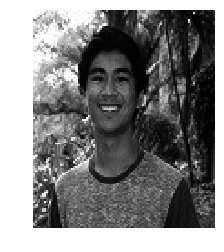

U:


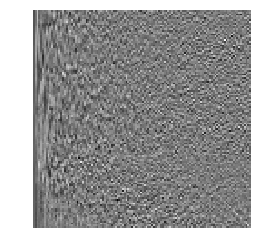

D:


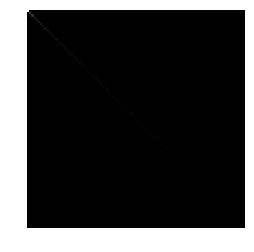

Vt:


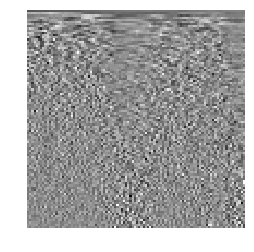

'\nprint("A:")\ndisplay_pgm(image)\n\nprint("U:")\ndisplay_pgm(U)\n\nprint("D:")\ndisplay_pgm(D)\n\nprint("Vt:")\ndisplay_pgm(Vt)\n'

In [12]:
import numpy as np
import math

def scaleMatrix(M, upper, lower = 0):
    '''
    Re-scales a matrix (M) values from a lower limit (lower) to an upper limit (upper)
    '''
    maxVal = np.amax(M)
    minVal = np.amin(M)
    for rowNum, row in enumerate(M):
        for colNum, value in enumerate(row):
            M[rowNum][colNum] = upper * ((value - minVal)/(maxVal - minVal))
    
    return M

A = image
U, d, Vt = np.linalg.svd(A)
D = np.diag(d)

print('A = UDVt')
print("A:")
display_pgm(image)

U = scaleMatrix(U, 255, 0)   
print("U:")
display_pgm(U) 

D = scaleMatrix(D, 255, 0)
print("D:")
display_pgm(D) 

Vt = scaleMatrix(Vt, 255, 0)
print("Vt:")
display_pgm(Vt)

### b)

original (p = 100)


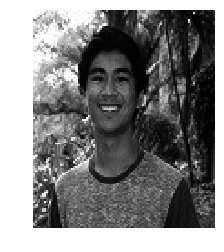

p = 1 singular values


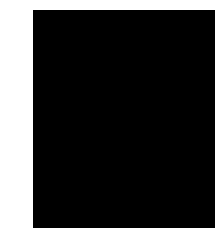

p = 2 singular values


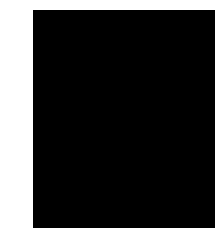

p = 3 singular values


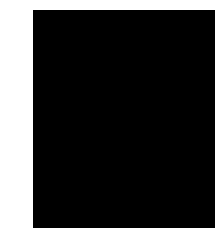

p = 4 singular values


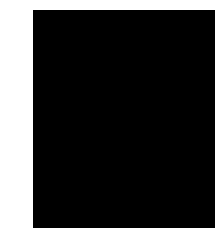

p = 5 singular values


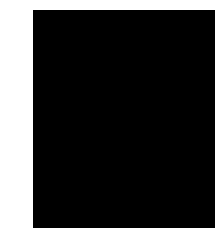

p = 10 singular values


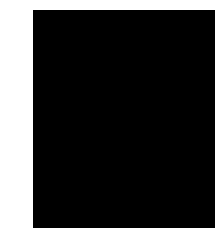

p = 20 singular values


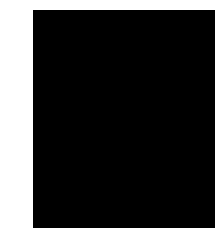

p = 30 singular values


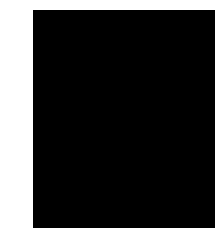

p = 40 singular values


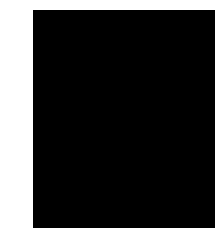

p = 90 singular values


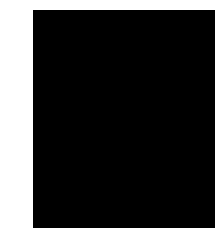

In [34]:
import numpy as np
import numpy.linalg

Ahat = []
m = U[:,0].size
n = d.size

for i in range(1, n+1):
    Ahat.append(
        numpy.matmul(
            numpy.matmul(
                U[:,:i],
                numpy.diag(d[:i])
            ),
            Vt[:i,:]
        )
    )
    
print("original (p = 100)")
display_pgm(image)
    #print('\n')
visualExamples = [1, 2, 3, 4, 5, 10, 20, 30, 40, 90]


for i, exampleValue in enumerate(visualExamples):
    #print(Ahat[value])
    for cell, cellVal in np.ndenumerate(Ahat[exampleValue-1]):
        if cellVal > 255:
            Ahat[exampleValue-1][cell[0]][cell[1]] = 255
        if cellVal < 0:
            Ahat[exampleValue-1][cell[0]][cell[1]] = 0


for i, exampleValue in enumerate(visualExamples):
    print('p = {} singular values'.format(exampleValue))
    display_pgm(Ahat[exampleValue-1])
    #pass

### c)

In [37]:
print(U)

print(U[:,:1])

[[ 78.46757962 118.98597259 191.26739903 ... 101.49651974 118.78043388
  128.77890333]
 [ 79.24747468 115.14649043 190.45922382 ... 136.96747825 124.48620582
  151.1211594 ]
 [ 79.33270365 111.84273164 194.20022455 ...  98.71702553  80.95149893
  109.41033824]
 ...
 [105.09879374  80.12963763 114.77620249 ... 204.1613261  122.9890269
  139.92245945]
 [104.56192496  76.17012016 114.50485938 ...  75.38960551 205.27003959
  116.79328505]
 [105.85320839  80.71444806 116.24977186 ...  85.81204838 131.58709555
  143.11809204]]
[[ 78.46757962]
 [ 79.24747468]
 [ 79.33270365]
 [ 80.74272579]
 [ 83.96652209]
 [ 85.1217618 ]
 [ 84.2347531 ]
 [ 83.15856073]
 [ 81.6840549 ]
 [ 83.55748661]
 [ 86.06258644]
 [ 85.44450651]
 [ 87.4525291 ]
 [ 87.24830019]
 [ 87.96311368]
 [ 87.13595427]
 [ 88.42600547]
 [ 89.76658167]
 [ 90.09681864]
 [ 93.08202012]
 [ 96.3996705 ]
 [ 98.11221929]
 [ 97.75991158]
 [ 95.01174935]
 [ 94.07943472]
 [ 94.07098207]
 [ 93.32834432]
 [ 93.37723652]
 [ 93.37221902]
 [ 93.556

In [35]:
def getMatMaxError(M1, M2, decimal=1):
    """
    Returns the maximum value of the absolute errors between two matrices (M1 & M2)
    of the same shape to a specified number of decimal places.
    """
    return round(np.amax(abs(M1 - M2)),
                 decimal
                )

def getMatMeanError(M1, M2, decimal=1):
    """
    Returns the mean value of the absolute errors between two matrices (M1 & M2)
    of the same shape to a specified number of decimal places.
    """
    return round(np.mean(abs(M1 - M2)),
                 decimal
                )

def getCompression(A, Ahat, p, decimal=1):
    """
    Returns the compression value between matrix A and it's approximation matrix Ahat
    based on the number of singular values, p, used.
    
    p is the number of singular values used to approximate Ahat.
    """
    kp = Ahat.shape[0]*p + p + p*Ahat.shape[1]      # kp = number of real numbers used in the pth approximation
    return round(
                    (1 - (kp/A.size))*100,
                    decimal
                 )

variableName = 'p'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):
    if exampleValue >= 10:
        exampleValue = '...' + str(exampleValue)
        outputString += f'{exampleValue:^7}'
    else:
        outputString += f'{exampleValue!s:^7}'
print(outputString)

print('{:85}'.format(85*'-'))

variableName = 'Max error'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):
    value = getMatMaxError(A, Ahat[exampleValue-1])            
    outputString += f'{value:>7}'
print(outputString)


variableName = 'Mean error'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):
    value = getMatMeanError(A, Ahat[exampleValue-1])
    outputString += f'{value:>7}'
print(outputString)

variableName = 'Compression, %'
outputString = f'{variableName:<14}|'
for i, exampleValue in enumerate(visualExamples):   
    value = getCompression(A, Ahat[exampleValue-1], exampleValue)            
    outputString += f'{value:>7}'
print(outputString)

    


p             |   1      2      3      4      5    ...10  ...20  ...30  ...40  ...90 
-------------------------------------------------------------------------------------


ValueError: operands could not be broadcast together with shapes (2734,100) (120,100) 

Negative values of compression correspond to the SVD approximation taking more disk space to store than the original image (for example with p = 90). This is because SVD approximation requires 3 matrices U, D, and Vt which will eventually require use real numbers than the original image (just one matrix of numbers) the more singular values you use for approximation.

In [ ]:
print('{:<7s}{:<7}'.format('p', 'Compression (%)'))

outputString = ''
foundSmallest_p = False
for i, value in enumerate(Ahat):
    value = getCompression(A, value, i+1)
    if not foundSmallest_p and value < 0:
        outputString = outputString[:-2]
        outputString += ' <----- Smallest value of p for positive compression\n'
        foundSmallest_p = True
        smallest_p = (i, getCompression(A, Ahat[i-1], i))
    outputString += f'{i+1:<7}{value:<7}\n'
print(outputString)
print(f"The smallest value of p for which compression is positive is p = {smallest_p[0]} which a compression of {smallest_p[1]}%")
    

### d)

In [ ]:
closestApprox = 49
closestCompressionValue = getCompression(A, Ahat[closestApprox - 1], closestApprox)
closestMeanError = getMatMeanError(A, Ahat[closestApprox - 1])

print('The most compressed approximation suitable to me is Ahat49 using 49 singular values:')
display_pgm(Ahat[49 - 1])
print('Comparing to the original:')
display_pgm(A)

print('I chose this as the closest approximation because it was the first compressed approximation from which I could\nsubjectively tell no difference with the original image as more singular values were used to approximate it.\n')

print('Approximation Ahat49:')
print(f'Compression value (%) = {closestCompressionValue}')
print(f'Mean Error = {closestMeanError}')

## Problem 3 - Principal Components to Find Geographical Structure

### a)

In [2]:
import numpy as np
import math

def convertToMatrix(dataList, col):
    '''
    Converts a list of ints (dataList) into a 2D array according to number of columns (col). 
    '''
    return np.array([dataList[i:i+col] for i in range(0, len(dataList), col)])

def centreMatrix(M):
    '''
    Centres 2D array/matrix (M) so that each row sums to zero.
    This is done by subrtracting each element by the row mean.
    '''
    numCols = M.shape[1]
    means = [np.mean(row) for row in M]

    matrixOfRowMeans = [
        [means[i] for j in range(0, numCols)]
        for i in range(0, len(means))
    ]
    matrixOfRowMeans = np.asarray(matrixOfRowMeans)
    
    return M - matrixOfRowMeans


f = open('snps.txt','r')
data = f.read()
numCols = len(
    data.partition('\n')[0].split() # Finds the first column separated by '\n' and splits it into a list of 1s and 0s
)
dataSplit = data.split()
dataSplit = [int(digit) for digit in dataSplit] # converts list of strings into ints

A = convertToMatrix(dataSplit, numCols).T
B = centreMatrix(A)
X = math.sqrt(1/(B.shape[1] - 1))*B

P = np.linalg.svd(X)[0]  # Since the U matrix (index=0) of performing SVD on X is the projection matrix P
                         # The columns of P are the eigenvectors of Sigma ((1/n-1)BBt)        

    

[[12.25345945 13.31654607 13.37543386 ... 14.83494117 14.3920027
  14.90921092]
 [ 7.66429527  5.23714412  6.47311786 ... -2.39131583  6.77375209
  -0.30910221]
 [-1.66155228 -3.5841081  -0.48174217 ...  1.74278162  0.80364803
  -0.78392271]
 ...
 [ 0.15144097  0.15144097  0.15144097 ...  0.15144097  0.15144097
   0.15144097]
 [ 0.65486676  0.65486676  0.65486676 ...  0.65486676  0.65486676
   0.65486676]
 [ 0.39619214  0.39619214  0.39619214 ...  0.39619214  0.39619214
   0.39619214]]


In [92]:
print('{:^63}'.format('Principal Component'))
print('  {:^12}{:^12}{:^12}{:^12}{:^12}  '.format(1, 2, 3, 4, 5))
print('-'*63)
print(P[:5,:5], end='\n\n\n')


d = np.linalg.svd(X)[1]
print('{:^12}'.format('Principal'))
print('{:^12}{:^14}'.format('Component', 'Singular Value'))
print('-'*26)
for i, singularValue in enumerate(d):
    if singularValue < 0.0001:
        print(f'{i+1:^12}{singularValue:>14.{5}g}')
    else: 
        print(f'{i+1:^12}{singularValue:^14.{4}f}')

                      Principal Component                      
       1           2           3           4           5        
---------------------------------------------------------------
[[ 0.00309649 -0.0007713  -0.00668421  0.02467032 -0.00117122]
 [-0.00967343  0.00202     0.0031567  -0.01048967  0.01353448]
 [-0.01110168 -0.00341425  0.01207643  0.03225923 -0.00688643]
 [ 0.02960344 -0.02310279 -0.00512964 -0.01962407  0.01643924]
 [ 0.02029166  0.02630384 -0.01816446 -0.00753193  0.05100944]]


 Principal  
 Component  Singular Value
--------------------------
     1          5.0945    
     2          3.4809    
     3          3.0227    
     4          3.0100    
     5          2.9977    
     6          2.9675    
     7          2.9649    
     8          2.9510    
     9          2.9449    
     10         2.9213    
     11         2.9154    
     12         2.8999    
     13         2.8871    
     14         2.8794    
     15         2.8651    
     16         2

In [39]:
#print(P[:,:2].T.shape, A.shape)

L = np.matmul(P[:,:2].T, A).T    # Projecting original matrix A onto the first two principal components of projection matrix P

print("Matrix L: How much each individual (by row) is in direction of the first two principal components:\n")
print('  {:^25}'.format('Principal Component:'))
print('  {:^12}{:^12}'.format(1, 2))
print('-'*25)
print(L)


Matrix L: How much each individual (by row) is in direction of the first two principal components:

    Principal Component:   
       1           2      
-------------------------
[[12.25345945  7.66429527]
 [13.31654607  5.23714412]
 [13.37543386  6.47311786]
 [13.42642572 -0.3636625 ]
 [15.92288863 -0.74686909]
 [14.68502787  0.59857039]
 [13.81938536  7.51558499]
 [15.15975615 -1.45318795]
 [15.77602965 -0.65129337]
 [14.06883483  5.88993335]
 [14.01610033 -0.18179319]
 [ 2.00172653  0.74173201]
 [ 1.35411827  1.3899567 ]
 [13.72498617  6.2981713 ]
 [ 2.01946814  2.15120017]
 [14.17543562 -1.3568976 ]
 [13.36615439  0.09546892]
 [14.2147831  -2.02240075]
 [ 2.15193829  0.43390261]
 [13.9484748  -0.19928523]
 [14.66870428  0.64094981]
 [ 1.71200916  2.72280705]
 [14.34130585 -2.26695624]
 [11.96829961  8.14189593]
 [14.91098254  0.06427109]
 [13.55784888  4.55324331]
 [13.70352075  7.33297375]
 [ 1.56403991  1.75443817]
 [14.74362412 -1.63828965]
 [13.07938751  6.01307742]
 [ 1.1886